## 4.5　学習アルゴリズムの実装

In [27]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

ミニバッチとして無作為に選ばれたデータを使用して行う勾配降下法を、**確率的勾配降下法**という。

### 4.5.1　2層ニューラルネットワークのクラス

In [2]:
os.getcwd()

'/Users/yuta.shimizu/Downloads/ML'

In [3]:
os.chdir('/Users/yuta.shimizu/Downloads/ML/deep-learning-from-scratch-master/ch01')
os.getcwd()

'/Users/yuta.shimizu/Downloads/ML/deep-learning-from-scratch-master/ch01'

In [4]:
sys.path.append(os.pardir)

In [5]:
from common.functions import *
from common.gradient import numerical_gradient

class とは複数の関数の集合体であり、self はインスタンスの代名詞である。

In [6]:
class TwoLayerNet:
    
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        
        return  cross_entropy_error(y, t)
    
    def accuracy(selt, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [7]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [8]:
x = np.random.rand(100, 784)
y = net.predict(x)

In [9]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


np.random.rand の復習をしておく。

In [10]:
x = np.random.rand(3, 3)
x

array([[0.86896322, 0.77898281, 0.07108047],
       [0.8870859 , 0.06832449, 0.03809613],
       [0.92532726, 0.03278443, 0.25097564]])

### 4.5.2　ミニバッチ学習の実装

In [11]:
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

In [12]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
train_loss_list = []

In [13]:
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

In [14]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [15]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

### 4.5.3　テストデータでの評価

エポック（epoch）とは単位を表す。<br>
**1 エポックとは、ミニバッチ学習における訓練データをすべて使い切るための回数**である。

10,000 個の訓練データに対して、100 個のミニバッチ学習をする場合に<br>
確率的勾配降下法を 100 回繰り返せば、すべての訓練データを使い切ったことになる。<br>
ここでの 100 回が 1 エポックになる。

In [42]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
train_loss_list = []

In [37]:
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

In [38]:
train_loss_list = []
train_acc_list = []
test_acc_list = []
iter_per_epoch = max(train_size / batch_size, 1)

In [39]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [40]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('train acc, test acc | ' + str(train_acc) + ',' + str(test_acc))

train acc, test acc | 0.10441666666666667,0.1028
train acc, test acc | 0.7901333333333334,0.7967
train acc, test acc | 0.8769833333333333,0.8796
train acc, test acc | 0.8985333333333333,0.9025
train acc, test acc | 0.9087166666666666,0.9097
train acc, test acc | 0.91485,0.917
train acc, test acc | 0.9201166666666667,0.922
train acc, test acc | 0.9252166666666667,0.9259
train acc, test acc | 0.9286666666666666,0.9313
train acc, test acc | 0.9318166666666666,0.9324
train acc, test acc | 0.93455,0.9358
train acc, test acc | 0.9377833333333333,0.9368
train acc, test acc | 0.9404666666666667,0.9392
train acc, test acc | 0.9420666666666667,0.9418
train acc, test acc | 0.9437666666666666,0.9435
train acc, test acc | 0.9455,0.9449
train acc, test acc | 0.9468833333333333,0.946


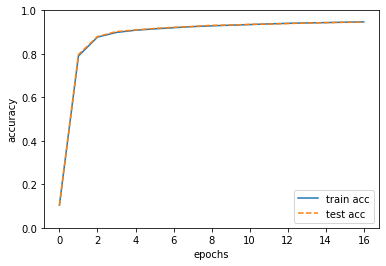

In [41]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

訓練データとテストデータを使って評価した認識精度は、両方とも向上している。<br>
そのため、2つの認識制度には差がないため、過学習が起きていないことが分かる。